# Learn how to use the phospho multimodal API

The goal of this notebook is to help you use the phospho multimodal API. phospho is an open source analytics platform for LLM apps. 

They have recently pushed a Vid2Caption model that we can use for mutliple things like:

- Answering visual questions
- Optical Character Recognition (OCR)
- Object Detection
- Captcha solver

Learn more here: https://phospho-app.github.io/docs/models/multimodal

## 1 - Setup the notebook

In [62]:
import requests
from IPython.display import Image

phospho_api_key = "YOUR_PHOSPHO_API_KEY_HERE"

if phospho_api_key == "YOUR_PHOSPHO_API_KEY_HERE":
    raise ValueError("Get your phospho API KEY from: https://phospho.ai/")

def get_response_from_api(question, image_url):
    url = 'https://api.phospho.ai/v2/predict'
    headers = {
        'accept': 'application/json',
        'Authorization': 'Bearer ' + phospho_api_key,
        'Content-Type': 'application/json'
    }
    data = {
        "inputs": [{"text": question, "image_url": image_url}],
        "model": "phospho-multimodal"
    }

    return requests.post(url, json=data, headers=headers).json()

## 2 - Basic API call

In [63]:
Image(url="http://images.cocodataset.org/val2017/000000039769.jpg")

In [64]:
response = get_response_from_api("Describe this image", "http://images.cocodataset.org/val2017/000000039769.jpg")
print(response['predictions'][0]['description'])

In the tranquil setting of this image, two cats, one gray and one brown, are peacefully sleeping on a pink couch. The gray cat is on the left, curled up in a ball with its head resting on its paws. Its fur is a soft gray, blending harmoniously with the pink of the couch. 

On the right, the brown cat is also curled up in a ball, but its head is resting on the armrest of the couch. Its fur is a warm brown, providing a nice contrast to the pink of the couch.

Between these two feline companions, there is a remote control. It's white with blue and green buttons, adding a touch of modernity to this cozy scene. The remote control is located between the two cats, almost as if it's their shared toy.

The image captures a moment of peace and comfort, with the cats sleeping soundly on the pink couch, oblivious to their surroundings. It's a snapshot of a quiet afternoon nap, where


## 3 - Some use cases

### A - Detect particular events

In [65]:
Image(url="https://images.ctfassets.net/mrbo2ykgx5lt/42348/a048a3be3147e574fd11c97b9067506b/frontiers-in-remote-sensing-global-forest-fires-map.png?&w=1056&fm=webp")

In [66]:
response = get_response_from_api("What do you see on this image ?", "https://images.ctfassets.net/mrbo2ykgx5lt/42348/a048a3be3147e574fd11c97b9067506b/frontiers-in-remote-sensing-global-forest-fires-map.png?&w=1056&fm=webp")
print(response['predictions'][0]['description'])

The image captures a dramatic scene of a forest fire. The fire, located in the center of the image, is characterized by a large plume of smoke that billows upwards, reaching towards the sky. The smoke is a mix of orange and white, indicating the intense heat and the presence of soot and ash. 

The fire is surrounded by a dense forest, with trees exhibiting a mix of green and brown hues. The trees, standing tall and seemingly unaffected by the fire, add a stark contrast to the scene. 

In the background, a mountain range stretches across the horizon, its peaks shrouded in a layer of haze. The haze, likely a result of the smoke from the fire, adds a sense of depth and scale to the image. 

The image does not contain any discernible text or countable objects. The relative positions of the objects suggest that the fire is the main focus, with the forest and mountain range serving as the backdrop. The image does not provide any


### B - Captcha solver

In [67]:
Image(url="https://www.okta.com/sites/default/files/media/image/2021-04/Okta-Captcha.png")

In [68]:
response = get_response_from_api("What text is written on this image in the blue background. Make sure to differenciate the capital letters", "https://www.okta.com/sites/default/files/media/image/2021-04/Okta-Captcha.png")
print(response['predictions'][0]['description'][:6])

TD4eva


### C - Object Detection

In [69]:
response = get_response_from_api("Can you locate the two humans on this image ? Give me X_min, X_max, Y_min, Y_max coordinates", "https://deepstackpython.readthedocs.io/en/latest/_images/test-image3.jpg")
print(response['predictions'][0]['description'][0:23])

[0.25, 0.14, 0.44, 0.8]


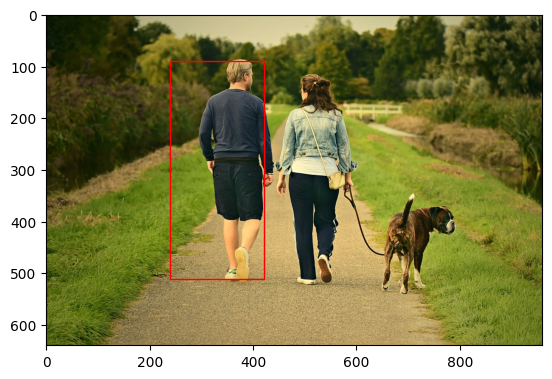

In [70]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open(requests.get("https://deepstackpython.readthedocs.io/en/latest/_images/test-image3.jpg", stream=True).raw)

fig, ax = plt.subplots()
ax.imshow(im)

rect = patches.Rectangle((int(0.25*im.size[0]), int(0.14*im.size[1])), int(0.19*im.size[0]), int(0.66*im.size[1]), linewidth=1, edgecolor='r', facecolor='none')

ax.add_patch(rect)
plt.show()

## 4 - Playground

In [71]:
image_url = "Replace this with the URL of the image you want to describe or encode your image in base64"
question = "You can ask a question about the image here"

In [ ]:
url = 'https://api.phospho.ai/v2/predict'
headers = {
    'accept': 'application/json',
    'Authorization': 'Bearer ' + phospho_api_key,
    'Content-Type': 'application/json'
}
data = {
    "inputs": [{"text": question, "image_url": image_url}],
    "model": "phospho-multimodal"
}

response = requests.post(url, json=data, headers=headers)

Image(url=image_url)
print(response.json()['predictions'][0]['description'])